# Training for GAN

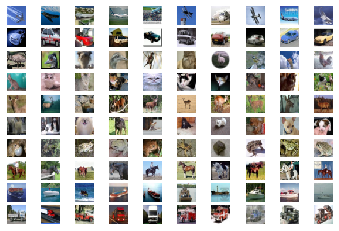

In [5]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#cifar10をダウンロード
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#画像を0-1の範囲で正規化
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

nclasses = 10
pos = 1
for i in range(nclasses):
    # クラスiの画像のインデックスリストを取得
    targets = np.where(y_test== i)[0]
    np.random.shuffle(targets)
    # 最初の10枚の画像を描画
    for idx in targets[:10]:
        plt.subplot(10, 10, pos)
        img = x_test[idx]
        # (channel, row, column) => (row, column, channel)
        plt.imshow(img.reshape(32, 32, 3))
        plt.axis('off')
        #label = label_names[i]
        pos += 1
plt.show()

y_train_o = y_train
y_test_o = y_test
#正解ラベルをOne-Hot表現に変換
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=10, batch_size=1000,
         verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
14000/50000 [=======>......................] - ETA: 24s - loss: 2.9548 - accuracy: 0.1114

KeyboardInterrupt: 

In [6]:
#モデルを構築
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,nb_epoch=1,verbose=1,validation_split=0.1)

#モデルと重みを保存
json_string=model.to_json()
open('cifar10_cnn.json',"w").write(json_string)
model.save_weights('cifar10_cnn.h5')

#モデルの表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

C:\Users\uekaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 45000 samples, validate on 5000 samples
Epoch 1/1
45000/45000 [==============================] - 80s 2ms/step - loss: 1.6744 - accuracy: 0.3888 - val_loss: 1.2878 - val_accuracy: 0.5526
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________

In [23]:
print(model.predict_proba(x_train[:2, :, :, :],verbose=0))
print(y_train[:2])
print(x_train.shape)

[[0.00637114 0.00291104 0.0402585  0.24227256 0.0715561  0.17458695
  0.41264573 0.0429583  0.00203939 0.00440032]
 [0.09126075 0.28036532 0.03401517 0.00846004 0.00679078 0.00631463
  0.00262461 0.00205142 0.21513933 0.35297796]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(50000, 32, 32, 3)


(2, 32, 32, 3)
[[0.00378489 0.00209096 0.04559716 0.3814991  0.06630754 0.26985112
  0.19267176 0.02942797 0.00545999 0.00330948]
 [0.00378489 0.00209096 0.04559716 0.3814991  0.06630754 0.26985112
  0.19267176 0.02942797 0.00545999 0.00330948]]
[3 3]


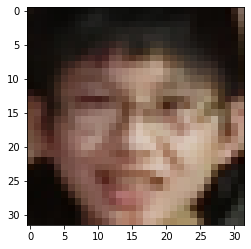

In [37]:
imgs = []
imgs.append(np.asarray(Image.open('Ftest.png')))
imgs.append(np.asarray(Image.open('Ftest.png')))
imgs = np.array(imgs)
imgs.astype('float32')
imgs = imgs/255
print(imgs.shape)
plt.imshow(imgs[0])
print(model.predict_proba(imgs,verbose=0))
print(model.predict_classes(imgs,verbose=0))

## True or False

In [35]:
target=3

y_train_2 = np.zeros((len(y_train), 2))
for i in range(len(y_train)):
    if y_train_o[i] == target:
        y_train_2[i, 0] = 1
    else:
        y_train_2[i, 1] = 1
y_test_2 = np.zeros((len(y_test), 2))
for i in range(len(y_test)):
    if y_test_o[i] == target:
        y_test_2[i, 0] = 1
    else:
        y_test_2[i, 1] = 1

print(y_train_o[:20])
print(y_train_2[:20])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(x_train, y_train_2, epochs=10, batch_size=1000,
         verbose=1, validation_data=(x_test, y_test_2))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - ETA: 37s - loss: 0.5750 - accuracy: 0.912 - ETA: 34s - loss: 1.0991 - accuracy: 0.918 - ETA: 33s - loss: 1.6994 - accuracy: 0.908 - ETA: 31s - loss: 1.8034 - accuracy: 0.910 - ETA: 30s - loss: 1.9738 - accuracy: 0.906 - ETA: 29s - loss: 2.0408 - accuracy: 0.902 - ETA: 29s - loss: 1.9656 - accuracy: 0.902 - ETA: 28s - loss: 1.8406 - accuracy: 0.902 - ETA: 27s - loss: 1.7065 - accuracy: 0.902 - ETA: 26s - loss: 1.5658 - accuracy: 0.903 - ETA: 25s - loss: 1.4834 - accuracy: 0.864 - ETA: 25s - loss: 1.4173 - accuracy: 0.814 - ETA: 24s - loss: 1.3614 - accuracy: 0.820 - ETA: 23s - loss: 1.3133 - accuracy: 0.827 - ETA: 23s - loss: 1.2712 - accuracy: 0.832 - ETA: 22s - loss: 1.2325 - accuracy: 0.837 - ETA: 21s - loss: 1.1954 - accuracy: 0.841 - ETA: 21s - loss: 1.1594 - accuracy: 0.842 - ETA: 20s - loss: 1.1235 - accuracy: 0.846 - ETA: 19s - loss: 1.0892 - accuracy: 0.849 - ETA: 19s - l

(2, 32, 32, 3)
[[0.31838492 0.68161505]
 [0.2798814  0.7201186 ]]
[1 1]


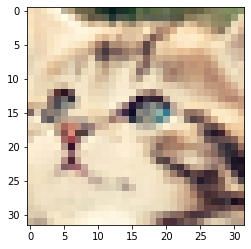

In [52]:
imgs = []
imgs.append(np.asarray(Image.open('Ftest.png')))
imgs.append(np.asarray(Image.open('cat.png')))
imgs = np.array(imgs)
imgs.astype('float32')
imgs = imgs/255
print(imgs.shape)
plt.imshow(imgs[1])
print(model.predict_proba(imgs,verbose=0))
print(model.predict_classes(imgs,verbose=0))